In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# import seaborn as sns

## Imputation

In [ ]:
df = pd.read_csv("stop_smoking_join.csv")
# EnforceBansTobaccoAd: how strict
df = df.rename(columns={'Unnamed: 0': 'row_num'})
df = df[df['GDP_USD'] != '..']
print(df.shape)  # (774, 11)
printMissing(df)
print(df.columns)

(768, 12)
fraction of missing values in features:
AvgCigarettePriceDollars       0.729167
AvgTaxesAsPctCigarettePrice    0.727865
ProductionMT                   0.872396
SalePerDay                     0.877604
GDP_USD                        0.130208
ProductionUSD                  0.907552
dtype: float64
data types of the features with missing values:
AvgCigarettePriceDollars       float64
AvgTaxesAsPctCigarettePrice    float64
ProductionMT                   float64
SalePerDay                     float64
GDP_USD                         object
ProductionUSD                  float64
dtype: object
fraction of points with missing values: 0.9830729166666666
Index(['row_num', 'Entity', 'Code', 'Year', 'AvgCigarettePriceDollars',
       'AvgTaxesAsPctCigarettePrice', 'EnforceBansTobaccoAd', 'HelpToQuit',
       'ProductionMT', 'SalePerDay', 'GDP_USD', 'ProductionUSD'],
      dtype='object')


In [ ]:
def printMissing(df):
    perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
    print('fraction of missing values in features:')
    print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
    print('data types of the features with missing values:')
    print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
    frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
    print('fraction of points with missing values:',frac_missing)  # is 1.0, so all the rows contain some missing

In [ ]:
df['GDP_USD'] = pd.to_numeric(df['GDP_USD'],errors = 'coerce')
printMissing(df)
#df.to_csv('stop_smoking_joint_updated.csv')

fraction of missing values in features:
AvgCigarettePriceDollars       0.729167
AvgTaxesAsPctCigarettePrice    0.727865
ProductionMT                   0.872396
SalePerDay                     0.877604
GDP_USD                        0.130208
ProductionUSD                  0.907552
dtype: float64
data types of the features with missing values:
AvgCigarettePriceDollars       float64
AvgTaxesAsPctCigarettePrice    float64
ProductionMT                   float64
SalePerDay                     float64
GDP_USD                        float64
ProductionUSD                  float64
dtype: object
fraction of points with missing values: 0.9830729166666666


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

used_columns = ['row_num', 'AvgCigarettePriceDollars', 'AvgTaxesAsPctCigarettePrice',\
               'EnforceBansTobaccoAd', 'HelpToQuit', 'ProductionMT', 'SalePerDay', 'GDP_USD', 'ProductionUSD']

imputer = IterativeImputer(estimator = RandomForestRegressor(n_estimators=10, random_state=1234), random_state=1234)
X_impute = imputer.fit_transform(df[used_columns])

/opt/anaconda3/envs/DATA1030/lib/python3.9/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [ ]:
df_imp = pd.DataFrame(data=X_impute, columns = used_columns)
df_imp = df[['row_num', 'Entity', 'Code', 'Year']].merge(df_imp, on='row_num')

df_imp.drop(columns=['row_num'], inplace=True)
no_use_entity = ['Yemen', 'Zambia', 'Zimbabwe']
todrop = df_imp[df_imp['Entity'].isin(no_use_entity)].index
df_imp.drop(index=todrop, axis=0, inplace=True)
printMissing(df_imp)
df_imp

fraction of missing values in features:
Series([], dtype: float64)
data types of the features with missing values:
Series([], dtype: object)
fraction of points with missing values: 0.0


,Entity,Code,Year,AvgCigarettePriceDollars,AvgTaxesAsPctCigarettePrice,EnforceBansTobaccoAd,HelpToQuit,ProductionMT,SalePerDay,GDP_USD,ProductionUSD
0,Algeria,DZA,2012,1.840,47.00,4.0,3.0,8130.000000,8.99,5592.220115,98.866147
1,Algeria,DZA,2014,2.090,40.90,4.0,4.0,7648.000000,8.91,5493.056663,104.019560
2,Argentina,ARG,2012,2.790,69.90,4.0,4.0,29797.300000,6.39,13082.664330,143.346043
3,Argentina,ARG,2014,3.470,69.70,4.0,5.0,24323.300000,6.42,12334.798250,77.359986
4,Armenia,ARM,2012,1.690,38.40,2.0,4.0,12137.217933,9.41,3681.844691,92.263650
...,...,...,...,...,...,...,...,...,...,...,...
757,Venezuela,VEN,2007,4.059,65.34,2.0,4.0,14991.900000,6.22,12097.084851,196.767693
758,Venezuela,VEN,2010,4.059,65.34,2.0,4.0,14991.900000,6.22,12097.084851,196.767693
759,Venezuela,VEN,2014,4.059,65.34,2.0,4.0,14991.900000,6.22,12097.084851,196.767693
760,Vietnam,VNM,2007,1.175,65.53,4.0,3.0,4570.193792,9.16,906.284230,133.558048


In [ ]:
df_imp.to_csv('stop_smoking_imputed_1.csv')

## Heatmaps

No handles with labels found to put in legend.


FileNotFoundError: [Errno 2] No such file or directory: 'graphs/HelpToQuit Index at Year 2007.png'

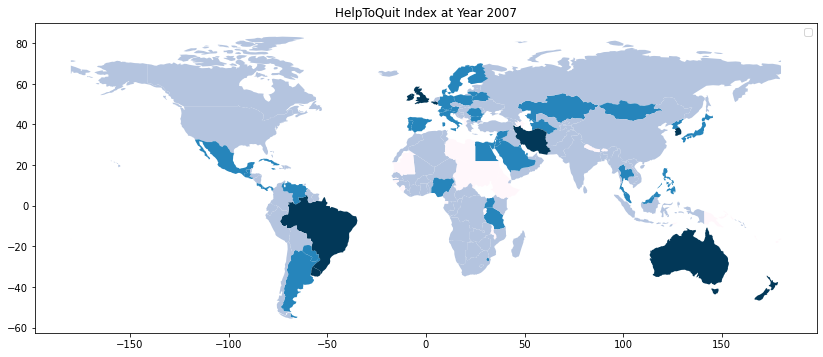

In [ ]:
import geopandas

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# world.plot()

world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

years = [2007, 2010, 2012, 2014]

for year in years:
    df_year = df[df['Year'] == year]
    # always use iso_a3 as the column name
    df_year = df_year.rename(columns={'Code': 'iso_a3'})
    # merge the target data to the world map
    world_year = world.merge(df_year, on='iso_a3')

    world_year.plot(column='HelpToQuit', figsize=(14, 8), cmap='PuBu', legend())
    plt.title('HelpToQuit Index at Year '+str(year))
    plt.savefig('graphs/HelpToQuit Index at Year '+str(year)+'.png')

## Stability Definition

In [ ]:
df_new = pd.read_csv('stop_smoking_nw.csv')
df_new.drop(columns=['Unnamed: 0.1'], axis=1, inplace=True)
df_new = df_new.rename(columns={'Unnamed: 0': 'row_num'})
df_new

,row_num,Entity,Code,Year,AvgCigarettePriceDollars,AvgTaxesAsPctCigarettePrice,EnforceBansTobaccoAd,HelpToQuit,ProductionMT,SalePerDay,GDP_USD,ProductionUSD,EconValue,InverseBan,Percentage of Death,NewQuit
0,0,Algeria,DZA,2012,1.840,47.00,4,3,8130.00000,8.52,5592.220115,107.316348,0.008369,0.25,0.000446,1
1,1,Algeria,DZA,2014,2.090,40.90,4,4,7648.00000,8.66,5493.056663,100.713852,0.007418,0.25,0.000449,2
2,2,Argentina,ARG,2012,2.790,69.90,4,4,7763.25989,6.40,13082.664330,95.835140,0.005329,0.25,0.001279,2
3,3,Argentina,ARG,2014,3.470,69.70,4,5,20069.96000,6.51,12334.798250,79.917662,0.005635,0.25,0.001217,3
4,4,Armenia,ARM,2012,1.690,38.40,2,4,23525.98910,8.91,3681.844691,128.014091,0.010376,0.50,0.001548,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,736,Venezuela,VEN,2007,5.020,65.94,2,4,24039.91000,4.29,8454.469536,236.821308,0.007769,0.50,0.000474,2
737,737,Venezuela,VEN,2010,4.754,66.52,2,4,20028.06000,4.73,13825.357120,208.233128,0.004800,0.50,0.000468,2
738,738,Venezuela,VEN,2014,4.622,66.52,2,4,20028.06000,5.14,16055.645320,208.233128,0.004135,0.50,0.000501,2
739,739,Vietnam,VNM,2007,1.627,57.29,4,3,15690.57190,8.31,906.284230,154.382567,0.061297,0.25,0.000801,1


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

use_stability = ['Entity', 'Year','AvgCigarettePriceDollars', \
                 'AvgTaxesAsPctCigarettePrice', 'EnforceBansTobaccoAd','HelpToQuit',\
                'GDP_USD']
std_features = ['AvgCigarettePriceDollars', 'AvgTaxesAsPctCigarettePrice',\
                    'EnforceBansTobaccoAd','HelpToQuit', 'GDP_USD']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, std_features)])

X_scaled = preprocessor.fit_transform(df_new)
feature_names = preprocessor.transformers_[0][-1]
df_scaled = pd.DataFrame(data=X_scaled,columns=feature_names)

In [ ]:
for key in use_stability:
    if key not in feature_names:
        df_scaled[key] = df_new[key]

df_grouped = df_scaled.groupby('Entity')
Variability = np.zeros(df_scaled.shape[0])
df_new['Variability'] = Variability

In [ ]:
years = [2007, 2010, 2012, 2014]

for key, grp in df_grouped: 
    if grp.shape[0] != 4:
        ind = df_new[df_new['Entity'] == key].index
        for i in ind:
            df_new.iloc[i]['Variability'] = np.nan
        continue
        
    values = np.zeros((4,len(std_features)))
    for i in range(4):
        values[i] = grp[grp['Year']==years[i]][std_features].values
        
    # interpolation for 2008, to obtain identical interval
    list08 = 2/3*values[0] + 1/3*values[1]
    values[0] = list08
    
    # to compute stability, use the std of four list
    variab = 0
    for i in range(len(std_features)):
        variab += np.std(values[:, i])
        
    ind = df_new[df_new['Entity'] == key].index
    for i in ind:   
        df_new.at[i, 'Variability'] = variab

/opt/anaconda3/envs/DATA1030/lib/python3.9/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [ ]:
df_new

,row_num,Entity,Code,Year,AvgCigarettePriceDollars,AvgTaxesAsPctCigarettePrice,EnforceBansTobaccoAd,HelpToQuit,ProductionMT,SalePerDay,GDP_USD,ProductionUSD,EconValue,InverseBan,Percentage of Death,NewQuit,Variability
0,0,Algeria,DZA,2012,1.840,47.00,4,3,8130.00000,8.52,5592.220115,107.316348,0.008369,0.25,0.000446,1,0.996268
1,1,Algeria,DZA,2014,2.090,40.90,4,4,7648.00000,8.66,5493.056663,100.713852,0.007418,0.25,0.000449,2,0.996268
2,2,Argentina,ARG,2012,2.790,69.90,4,4,7763.25989,6.40,13082.664330,95.835140,0.005329,0.25,0.001279,2,2.036899
3,3,Argentina,ARG,2014,3.470,69.70,4,5,20069.96000,6.51,12334.798250,79.917662,0.005635,0.25,0.001217,3,2.036899
4,4,Armenia,ARM,2012,1.690,38.40,2,4,23525.98910,8.91,3681.844691,128.014091,0.010376,0.50,0.001548,2,1.264145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,736,Venezuela,VEN,2007,5.020,65.94,2,4,24039.91000,4.29,8454.469536,236.821308,0.007769,0.50,0.000474,2,0.463144
737,737,Venezuela,VEN,2010,4.754,66.52,2,4,20028.06000,4.73,13825.357120,208.233128,0.004800,0.50,0.000468,2,0.463144
738,738,Venezuela,VEN,2014,4.622,66.52,2,4,20028.06000,5.14,16055.645320,208.233128,0.004135,0.50,0.000501,2,0.463144
739,739,Vietnam,VNM,2007,1.627,57.29,4,3,15690.57190,8.31,906.284230,154.382567,0.061297,0.25,0.000801,1,0.674881


## HarmValue

In [ ]:
harmValue = np.zeros(df_new.shape[0])
for i in range(df_new.shape[0]):
    deathrate, newquit = df_new.iloc[i]['Percentage of Death'], df_new.iloc[i]['NewQuit']
    #harmValue[i] = np.exp(1000*deathrate)  - newquit
    harmValue[i] = (1700*deathrate)**1.3  - 0.5*newquit
df_new['HarmValue'] = harmValue

In [ ]:
df_new.drop(columns=['row_num'], axis=1, inplace=True)
df_new.to_csv('stop_smoking_finished.csv')

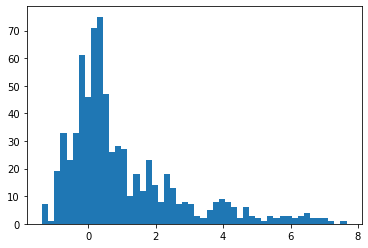

In [ ]:
plt.hist(df_new['HarmValue'], bins=50)
plt.show()

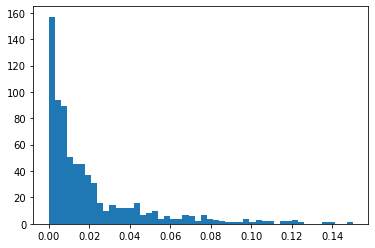

In [ ]:
plt.hist(df_new['EconValue'], bins=50)
plt.show()

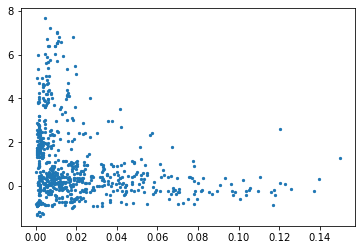

In [ ]:
plt.scatter(df_new['EconValue'], df_new['HarmValue'], s=5)

In [ ]:
pos1 = np.argmax(np.array(df_new['EconValue']))
df_new.iloc[pos1]
#df_new[(df_new['EconValue'] > 0.10) & (df_new['HarmValue'] > 2)]

Entity                              Nepal
Code                                  NPL
Year                                 2007
AvgCigarettePriceDollars            1.163
AvgTaxesAsPctCigarettePrice         63.39
EnforceBansTobaccoAd                    2
HelpToQuit                              2
ProductionMT                        276.8
SalePerDay                           8.31
GDP_USD                        391.380057
ProductionUSD                    0.365956
EconValue                        0.150113
InverseBan                            0.5
Percentage of Death              0.000703
NewQuit                                 0
Variability                      2.117132
HarmValue                        1.260542
Name: 554, dtype: object

In [ ]:
#pos2 = np.argmax(np.array(df_new['HarmValue']))
#df_new.iloc[pos2]
cond1 = df_new['HarmValue'] > 5.7
cond2 = df_new['Year']==2014
df_new[cond1 & cond2]['Entity'].unique()

array(['Bulgaria', 'Hungary', 'Serbia', 'Montenegro'], dtype=object)

In [ ]:
pos3 = np.argmax(np.array(df_new['Variability']))
df_new.iloc[pos3]

Entity                         United Arab Emirates
Code                                            ARE
Year                                           2012
AvgCigarettePriceDollars                       1.55
AvgTaxesAsPctCigarettePrice                    24.5
EnforceBansTobaccoAd                              4
HelpToQuit                                        5
ProductionMT                            51710.17201
SalePerDay                                     10.3
GDP_USD                                 40976.49075
ProductionUSD                            205.082579
EconValue                                  0.000598
InverseBan                                     0.25
Percentage of Death                        0.000152
NewQuit                                           3
Variability                                3.810645
HarmValue                                 -1.328513
Name: 189, dtype: object

In [ ]:
df_new[df_new['Code'] == 'MMR']

,Entity,Code,Year,AvgCigarettePriceDollars,AvgTaxesAsPctCigarettePrice,EnforceBansTobaccoAd,HelpToQuit,ProductionMT,SalePerDay,GDP_USD,ProductionUSD,EconValue,InverseBan,Percentage of Death,NewQuit,Variability,HarmValue
543,Myanmar,MMR,2007,2.092,65.59,4,3,19982.46793,8.00,512.580086,161.206515,0.120411,0.25,0.001411,1,0.766683,2.618820
544,Myanmar,MMR,2010,1.180,59.93,4,3,7870.78910,8.31,1018.131730,134.231863,0.057195,0.25,0.001344,1,0.766683,2.426134
545,Myanmar,MMR,2012,1.180,59.93,4,3,7870.78910,8.31,1035.804240,134.231863,0.056247,0.25,0.001316,1,0.766683,2.347665
546,Myanmar,MMR,2014,1.152,59.94,4,4,5296.58360,8.31,1140.766520,82.141161,0.051210,0.25,0.001298,2,0.766683,1.798260


In [ ]:
df_new[df_new['Entity'] == 'Turkey']

,Entity,Code,Year,AvgCigarettePriceDollars,AvgTaxesAsPctCigarettePrice,EnforceBansTobaccoAd,HelpToQuit,ProductionMT,SalePerDay,GDP_USD,ProductionUSD,EconValue,InverseBan,Percentage of Death,NewQuit,Variability,HarmValue
183,Turkey,TUR,2012,4.920,80.30,5,5,23654.200,4.43,11795.63346,162.062174,0.006785,0.20,0.001013,3,2.196664,0.528362
184,Turkey,TUR,2014,5.630,82.20,5,5,128157.751,4.62,12157.99043,1011.192284,0.006738,0.20,0.001015,3,2.196664,0.533154
708,Turkey,TUR,2007,4.569,65.49,2,3,21912.700,4.67,9791.88245,222.472213,0.006666,0.50,0.000960,1,2.196664,1.390687
709,Turkey,TUR,2010,4.994,68.66,4,5,20998.280,4.26,10742.77498,170.083275,0.006371,0.25,0.001019,3,2.196664,0.542374


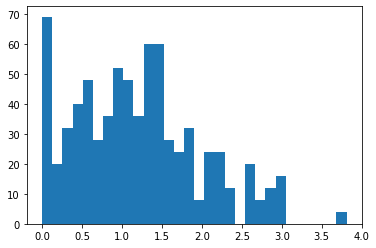

In [ ]:
plt.hist(df_new['Variability'], bins=30, label="Variability")
plt.show()

In [ ]:
df_kde = df_new[df_new['Year']==2014]
printMissing(df_kde)
df_kde.dropna(axis=0, inplace=True)

fraction of missing values in features:
Percentage of Death    0.032258
HarmValue              0.032258
dtype: float64
data types of the features with missing values:
Percentage of Death    float64
HarmValue              float64
dtype: object
fraction of points with missing values: 0.03225806451612903


/opt/anaconda3/envs/DATA1030/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
printMissing(df_kde)
df_kde.shape
df_kde[['EconValue', 'HarmValue', 'Variability']].to_csv('df_kde.csv')

fraction of missing values in features:
Series([], dtype: float64)
data types of the features with missing values:
Series([], dtype: object)
fraction of points with missing values: 0.0
